In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import mysql.connector
import config
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = "Movie Project1"
)
cursor = cnx.cursor()
print(cnx)

In [14]:
query1 = ("""SELECT genre, AVG(ratings)
             FROM `Movie Project1`.Reviews
             JOIN `Movie Project1`.Genres USING (title)
             GROUP BY genre""")
cursor.execute(query1)
query1_result = cursor.fetchall()

In [15]:
query1_result

[('Rom-Com', 6.0986577072399575),
 ('Horror', 5.9107382425525845),
 ('3D', 6.582758636310182),
 ('Animation', 6.702727278796109),
 ('Gay/Lesbian', 6.951515125505852)]

In [18]:
genres = []
avg_ratings = []
for t in query1_result:
    genres.append(t[0])
    avg_ratings.append(t[1])
print(genres)
print(avg_ratings)

['Rom-Com', 'Horror', '3D', 'Animation', 'Gay/Lesbian']
[6.0986577072399575, 5.9107382425525845, 6.582758636310182, 6.702727278796109, 6.951515125505852]


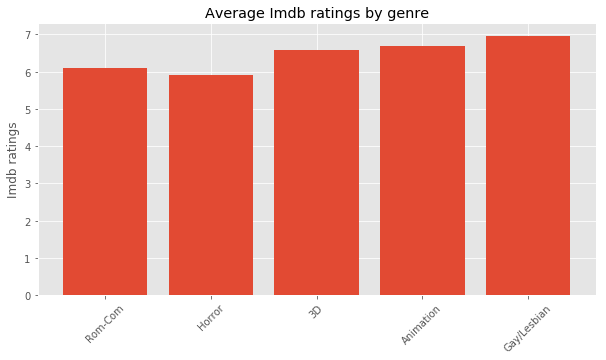

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(genres, avg_ratings)

ax.set_xticklabels(genres, rotation=45)

ax.set_ylabel("Imdb ratings")

ax.set_title('Average Imdb ratings by genre')

plt.show()